<a href="https://colab.research.google.com/github/sushmithanagamuthu/Basic-Information/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


In [ ]:
heart_data = pd.read_csv("/content/heart_disease_dataset.csv")


In [ ]:
# Display basic info
print("Dataset Overview:")
print(heart_data.head())
print(heart_data.info())

In [ ]:
# Check for missing values
print("Missing Values:")
print(heart_data.isnull().sum())

Missing Values:
Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64


In [ ]:
# Define target variable
y = heart_data['Heart Disease']
X = heart_data.drop(['Heart Disease'], axis=1)

In [ ]:
# Identify categorical and numerical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Create the Logistic Regression model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=500, class_weight='balanced', random_state=42))
])

In [ ]:
# Train the model
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours',
       'Stress Level', 'Blood Sugar'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes',
       'Obesity', 'Exercise Induced Angina', 'Chest Pain Type'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=500,
                                    random_state=42))])

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Cholesterol vs Heart Disease by Smoking Status')

<Figure size 800x500 with 0 Axes>

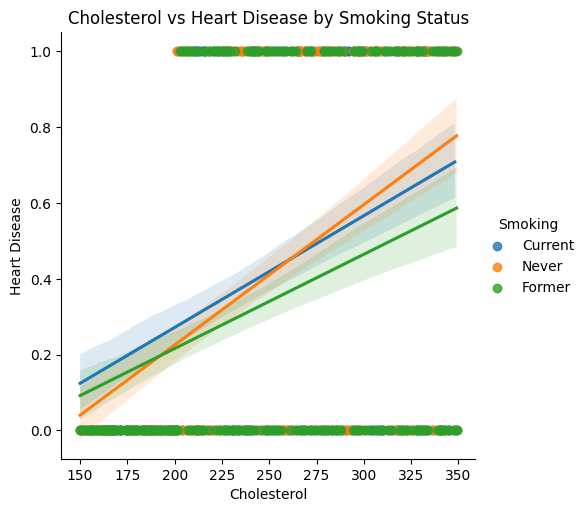

In [ ]:
# Seaborn Visualizations
plt.figure(figsize=(8, 5))
sns.lmplot(x="Cholesterol", y="Heart Disease", hue="Smoking", data=heart_data)
plt.title("Cholesterol vs Heart Disease by Smoking Status")



Text(0.5, 1.0, 'Blood Pressure Distribution by Heart Disease')

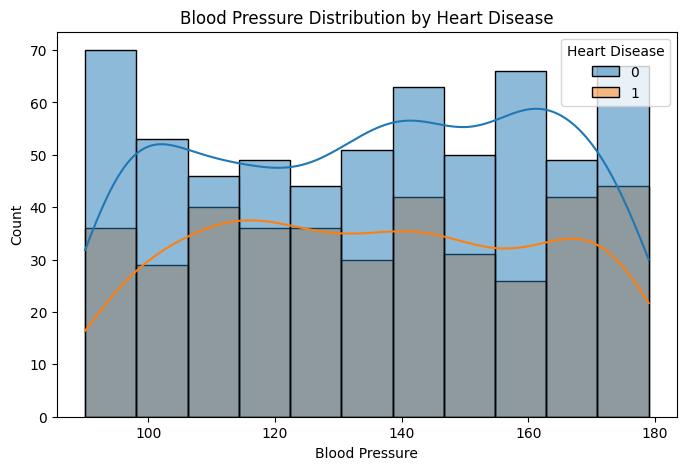

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=heart_data, x='Blood Pressure', hue='Heart Disease', kde=True)
plt.title("Blood Pressure Distribution by Heart Disease")


Text(0.5, 1.0, 'Smoking vs Heart Disease')

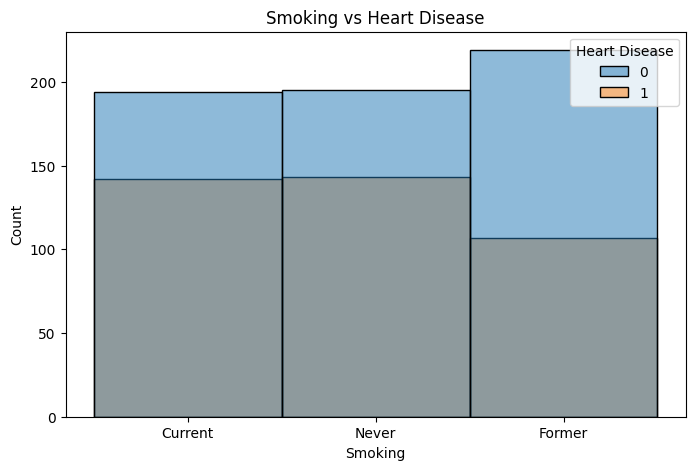

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=heart_data, x='Smoking', hue='Heart Disease', discrete=True)
plt.title("Smoking vs Heart Disease")


Text(0.5, 1.0, 'Stress Level vs Heart Disease')

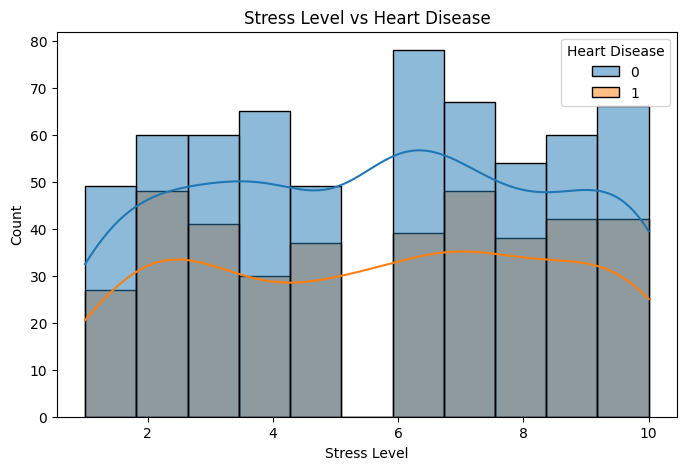

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=heart_data, x='Stress Level', hue='Heart Disease', kde=True)
plt.title("Stress Level vs Heart Disease")


Text(0.5, 1.0, 'Age Distribution by Heart Disease')

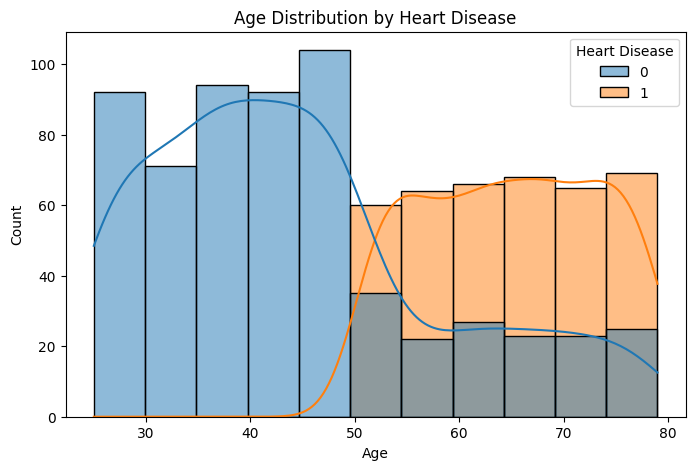

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=heart_data, x='Age', hue='Heart Disease', kde=True)
plt.title("Age Distribution by Heart Disease")


In [ ]:
plt.show()


In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


In [ ]:
# Display F1-score formula
print("\nF1-score Formula:")
print("F1 = 2 * (Precision * Recall) / (Precision + Recall)")



F1-score Formula:
F1 = 2 * (Precision * Recall) / (Precision + Recall)


In [ ]:
# Print evaluation results
print(f'\nModel Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)



Model Accuracy: 84.50%
F1 Score: 0.85

Confusion Matrix:
 [[104  18]
 [ 13  65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       122
           1       0.78      0.83      0.81        78

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.85      0.84      0.85       200

